In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def step_func(x):
    if x > 0:
        return 1
    else:
        return 0

In [9]:
# Step function
def step_func(x):
    res = np.array([])
    for n in x:
        if n > 0:
            res = np.append(res, [1])
        else:
            res = np.append(res, [0])
    return res

In [10]:
# Step function
def step_func(x):
    res = [1 if n > 0 else 0 for n in x]
    return res

In [11]:
# Step function
def step_func(x):
    res = x > 0
    return res.astype(int)

In [12]:
res = np.array([])
res

array([], dtype=float64)

In [13]:
x = np.array([-0.8, 0, 0.2, 0.5])
step_func(x)

array([0, 0, 1, 1])

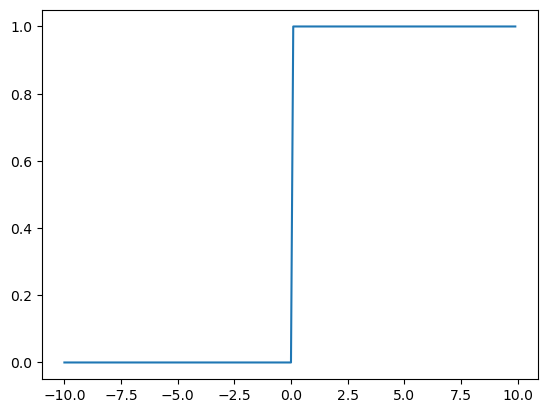

In [14]:
# Step function
def step_func(x):
    res = [1 if n > 0 else 0 for n in x]
    return res

x = np.arange(-10, 10, 0.1)
y = step_func(x)
plt.plot(x, y)
plt.show()

In [15]:
# Sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [16]:
sigmoid(0.2)

0.549833997312478

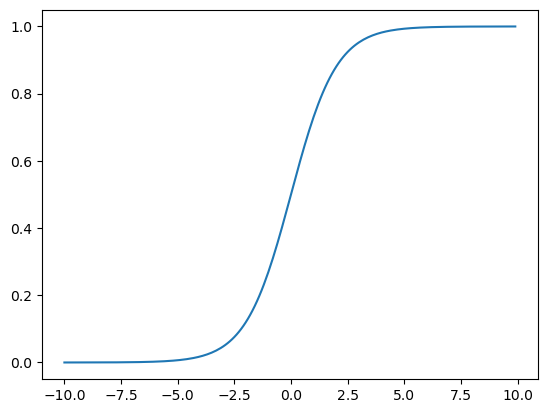

In [17]:
# Sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

In [18]:
# ReLU
def relu(x):
    return np.maximum(0, x)

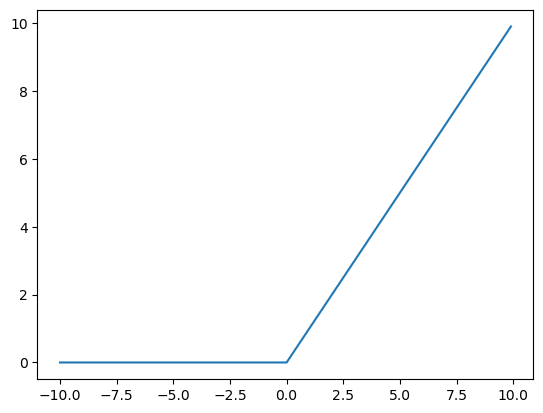

In [19]:
# ReLU
def relu(x):
    return np.maximum(0, x)

x = np.arange(-10, 10, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

### 신경망에서의 행렬 곱

In [20]:
'''
X : 1 x 2 벡터
W : 2 x 3 행렬

XW의 결과 -> 1 x 3
'''
W = np.array([[1, 3, 5], [2, 4, 6]])
X = np.array([1, 2])

def weight_sum(X, W):
    return np.dot(X, W)

weight_sum(X, W)

array([ 5, 11, 17])

In [21]:
'''
X : 1 x 2 벡터
W1 : 2 x 3 행렬
B1 : 1 x 3 벡터

XW1 + B1의 결과 -> 1 x 3
'''
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

def weight_sum_with_bias(X, W, B):
    return np.dot(X, W) + B

weight_sum_with_bias(X, W1, B1)

array([0.3, 0.7, 1.1])

In [ ]:
'''
선형변환 이후 활성화 함수 적용
'''
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

def forward(X, W, B):
    return sigmoid(weight_sum_with_bias(X, W, B))

Z1 = forward(X, W1, B1)
print(Z1.shape)
print(Z1)

(3,)
[0.57444252 0.66818777 0.75026011]


In [23]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

Z2 = forward(Z1, W2, B2)

print(Z2.shape)
print(Z2)

(2,)
[0.62624937 0.7710107 ]


In [24]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

Z3 = forward(Z2, W3, B3)

print(Z3.shape)
print(Z3)

(2,)
[0.57855079 0.66736228]


In [29]:
X = np.array([1.0, 0.5])

# 1층
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
# 2층
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
# 3층(출력층)
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

weight = [W1, W2, W3]
bias = [B1, B2, B3]

def identity_func(X):
    return X

def forward(X, weight, bias):
    Z1 = sigmoid(weight_sum_with_bias(X, weight[0], bias[0]))
    Z2 = sigmoid(weight_sum_with_bias(Z1, weight[1], bias[1]))
    Z3 = identity_func(weight_sum_with_bias(Z2, weight[2], bias[2]))

    return Z3

res = forward(X, weight, bias)
print(res)


[0.31682708 0.69627909]


In [ ]:

def identity_func(X):
    return X

## 출력층 설계

### 항등함수와 소프트맥스 함수 구현하기

In [30]:
X = np.array([1010, 1000, 990])

In [31]:
# Softmax
def softmax(X):
    return np.exp(X)/np.sum(np.exp(X))

softmax(X)

C:\Users\andsosallycanwait00\AppData\Local\Temp\ipykernel_4228\2089282292.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(X)/np.sum(np.exp(X))
C:\Users\andsosallycanwait00\AppData\Local\Temp\ipykernel_4228\2089282292.py:3: RuntimeWarning: invalid value encountered in divide
  return np.exp(X)/np.sum(np.exp(X))


array([nan, nan, nan])

In [32]:
# Softmax
def softmax(X):
    C = np.max(X)
    return np.exp(X-C)/np.sum(np.exp(X-C))

softmax(X)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [34]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


In [35]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape) # train image
print(t_train.shape) # train target(label)
print(x_test.shape) # test image
print(t_test.shape) # test target(label)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [36]:
import sys, os
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [ ]:
from dataset.mnist import load_mnist

def get_data():
    return load_mnist(flatten=True, normalize=False)

# 입력 784, 은닉층 2개(50, 100), 출력 10
def init_network():
    network = {}
    
    network["W1"] = np.random.randn(784, 50)
    network["B1"] = np.random.randn(1, 50)
    network["W2"] = np.random.randn(50,100)
    network["B2"] = np.random.randn(1, 100)
    network["W3"] = np.random.randn(100,10)
    network["B3"] = np.random.randn(1, 10)

    return network

def predict(network, X):
    Z1 = sigmoid(np.dot(X, network["W1"]) + network["B1"])
    Z2 = sigmoid(np.dot(Z1, network["W2"]) + network["B2"])
    Z3 = softmax(np.dot(Z2, network["W3"]) + network["B3"])

    return Z3

In [55]:
(x_train, t_train), (x_test, t_test) = get_data()
network = init_network()

correct_answer_count = 0
for x, t in zip(x_test, t_test):
    logit = predict(network, x)
    y = np.argmax(logit)
    if t == y:
        correct_answer_count += 1

print(correct_answer_count/len(t_test))

C:\Users\andsosallycanwait00\AppData\Local\Temp\ipykernel_4228\1524535102.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


0.0969


In [56]:
(x_train, t_train), (x_test, t_test) = get_data()
network = init_network()

batch_size = 100
correct_answer_count = 0
for i in range(0, len(x_test), batch_size):
    X = x_test[i:i+batch_size]
    logit = predict(network, X)

    y = np.argmax(logit, axis=1)
    correct_answer_count += np.sum((y == t_test[i:i+batch_size]).astype("int8"))

print(correct_answer_count/len(t_test))

0.0973


C:\Users\andsosallycanwait00\AppData\Local\Temp\ipykernel_4228\1524535102.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
